## import & load

In [65]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

from collections import defaultdict
import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [66]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [85]:
import data.okx.read
importlib.reload(data.okx.read)

<module 'data.okx.read' from '/home/junlim/projects/jitter_recovery/data/okx/read.py'>

In [86]:
#df = data.okx.read.df_okx_20240101_0131.dropna()
df = data.okx.read.df_okx_20240228_0301.dropna()
#df = data.okx.read.df_okx_20240216_0229.dropna()
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [87]:
df.head(2)

,timestamp,symbol,open,high,low,close,volume
0,2024-02-28 05:00:00,SAND-USD-SWAP,0.56160,0.56160,0.56160,0.56160,0.0
1,2024-02-28 05:00:00,WAXP-USDT-SWAP,0.07055,0.07055,0.07047,0.07053,23500.0


In [88]:
df.tail(2)

,timestamp,symbol,open,high,low,close,volume
556996,2024-03-01 04:58:00,GFT-USDT-SWAP,0.02298,0.02298,0.02297,0.02297,50100.0
556997,2024-03-01 04:58:00,NEO-USD-SWAP,14.41500,14.41500,14.41500,14.41500,0.0


In [89]:
all_symbols = [s for s in all_symbols if s]

In [90]:
len([s for s in all_symbols if 'USDT' in s])

171

## multiple symbols

In [96]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.calculate_collective
importlib.reload(algo.jitter_recovery.calculate_collective)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.jitter_recovery.research_collective
importlib.reload(algo.jitter_recovery.research_collective)

<module 'algo.jitter_recovery.research_collective' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research_collective.py'>

In [93]:
# dfst_feature = pd.read_parquet('data/okx/dfst_feature_20240101_0131.parquet')

In [94]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)

In [97]:
dfst_feature = algo.jitter_recovery.research_collective.get_dfst_feature(df, feature_param)

0 symbol: WAXP-USDT-SWAP (feature)
1 symbol: API3-USDT-SWAP (feature)
2 symbol: ATOM-USDT-SWAP (feature)
3 symbol: UNI-USDT-SWAP (feature)
4 symbol: FET-USDT-SWAP (feature)
5 symbol: PYTH-USDT-SWAP (feature)
6 symbol: CVC-USDT-SWAP (feature)
7 symbol: FLM-USDT-SWAP (feature)
8 symbol: GAL-USDT-SWAP (feature)
9 symbol: STX-USDT-SWAP (feature)
10 symbol: INJ-USDT-SWAP (feature)
11 symbol: AIDOGE-USDT-SWAP (feature)
12 symbol: AAVE-USDT-SWAP (feature)
13 symbol: ID-USDT-SWAP (feature)
14 symbol: AGIX-USDT-SWAP (feature)
15 symbol: JTO-USDT-SWAP (feature)
16 symbol: LUNC-USDT-SWAP (feature)
17 symbol: DMAIL-USDT-SWAP (feature)
18 symbol: FLR-USDT-SWAP (feature)
19 symbol: ZRX-USDT-SWAP (feature)
20 symbol: COMP-USDT-SWAP (feature)
21 symbol: GMX-USDT-SWAP (feature)
22 symbol: ADA-USDT-SWAP (feature)
23 symbol: HBAR-USDT-SWAP (feature)
24 symbol: AXS-USDT-SWAP (feature)
25 symbol: APT-USDT-SWAP (feature)
26 symbol: CSPR-USDT-SWAP (feature)
27 symbol: 1INCH-USDT-SWAP (feature)
28 symbol: CRO

In [98]:
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.10, -0.30, -0.15, +0.04, -0.02)

In [99]:
dfst_trading = algo.jitter_recovery.research_collective.get_dfst_trading(df, dfst_feature, trading_param)

0 symbol: WAXP-USDT-SWAP: 0 (trading)
1 symbol: API3-USDT-SWAP: 38 (trading)
2 symbol: ATOM-USDT-SWAP: 0 (trading)
3 symbol: UNI-USDT-SWAP: 0 (trading)
4 symbol: FET-USDT-SWAP: 0 (trading)
5 symbol: PYTH-USDT-SWAP: 0 (trading)
6 symbol: CVC-USDT-SWAP: 0 (trading)
7 symbol: FLM-USDT-SWAP: 0 (trading)
8 symbol: GAL-USDT-SWAP: 0 (trading)
9 symbol: STX-USDT-SWAP: 0 (trading)
10 symbol: INJ-USDT-SWAP: 29 (trading)
11 symbol: AIDOGE-USDT-SWAP: 0 (trading)
12 symbol: AAVE-USDT-SWAP: 0 (trading)
13 symbol: ID-USDT-SWAP: 0 (trading)
14 symbol: AGIX-USDT-SWAP: 38 (trading)
15 symbol: JTO-USDT-SWAP: 39 (trading)
16 symbol: LUNC-USDT-SWAP: 39 (trading)
17 symbol: DMAIL-USDT-SWAP: 0 (trading)
18 symbol: FLR-USDT-SWAP: 0 (trading)
19 symbol: ZRX-USDT-SWAP: 0 (trading)
20 symbol: COMP-USDT-SWAP: 38 (trading)
21 symbol: GMX-USDT-SWAP: 0 (trading)
22 symbol: ADA-USDT-SWAP: 0 (trading)
23 symbol: HBAR-USDT-SWAP: 0 (trading)
24 symbol: AXS-USDT-SWAP: 0 (trading)
25 symbol: APT-USDT-SWAP: 0 (trading)
26 

<Axes: xlabel='timestamp'>

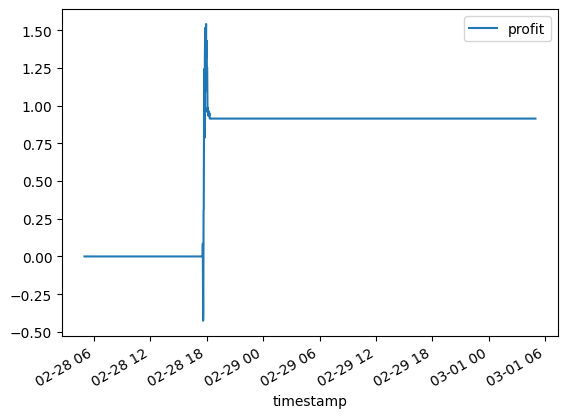

In [100]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

In [101]:
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.15, -0.03, +0.005, -0.01)

In [102]:
dfst_trading = algo.jitter_recovery.research_collective.get_dfst_trading(df, dfst_feature, trading_param)

0 symbol: WAXP-USDT-SWAP: 754 (trading)
1 symbol: API3-USDT-SWAP: 166 (trading)
2 symbol: ATOM-USDT-SWAP: 120 (trading)
3 symbol: UNI-USDT-SWAP: 281 (trading)
4 symbol: FET-USDT-SWAP: 454 (trading)
5 symbol: PYTH-USDT-SWAP: 169 (trading)
6 symbol: CVC-USDT-SWAP: 133 (trading)
7 symbol: FLM-USDT-SWAP: 154 (trading)
8 symbol: GAL-USDT-SWAP: 181 (trading)
9 symbol: STX-USDT-SWAP: 314 (trading)
10 symbol: INJ-USDT-SWAP: 413 (trading)
11 symbol: AIDOGE-USDT-SWAP: 0 (trading)
12 symbol: AAVE-USDT-SWAP: 123 (trading)
13 symbol: ID-USDT-SWAP: 63 (trading)
14 symbol: AGIX-USDT-SWAP: 490 (trading)
15 symbol: JTO-USDT-SWAP: 346 (trading)
16 symbol: LUNC-USDT-SWAP: 410 (trading)
17 symbol: DMAIL-USDT-SWAP: 219 (trading)
18 symbol: FLR-USDT-SWAP: 317 (trading)
19 symbol: ZRX-USDT-SWAP: 131 (trading)
20 symbol: COMP-USDT-SWAP: 412 (trading)
21 symbol: GMX-USDT-SWAP: 120 (trading)
22 symbol: ADA-USDT-SWAP: 163 (trading)
23 symbol: HBAR-USDT-SWAP: 116 (trading)
24 symbol: AXS-USDT-SWAP: 135 (trading)


<Axes: xlabel='timestamp'>

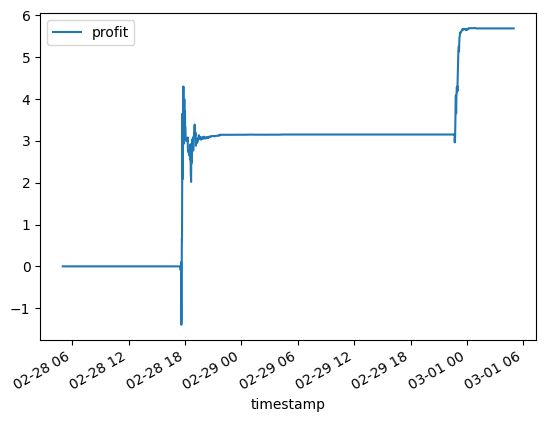

In [103]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

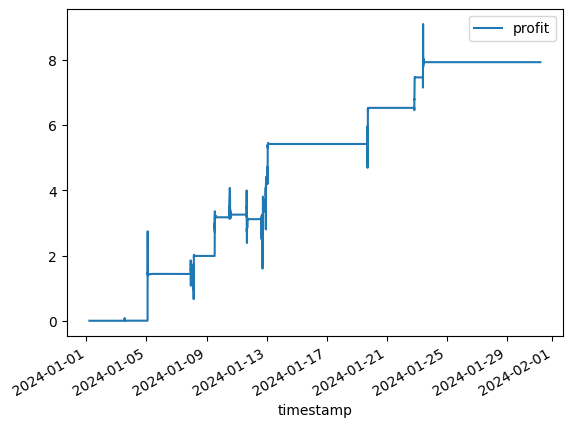

In [54]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

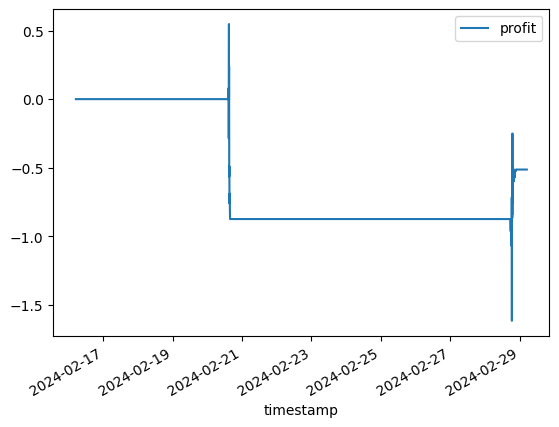

In [45]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

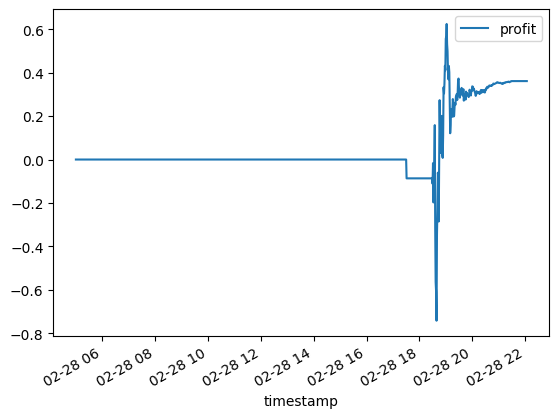

In [64]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

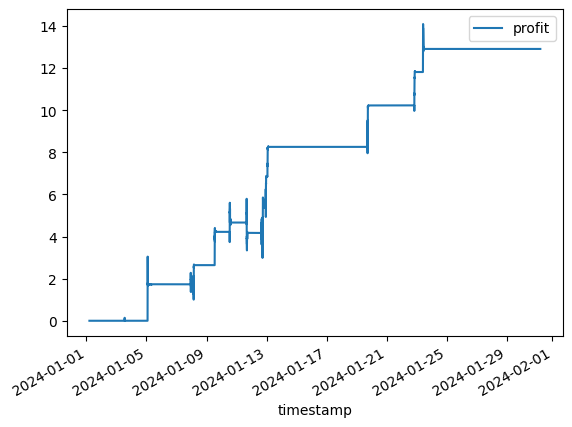

In [23]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

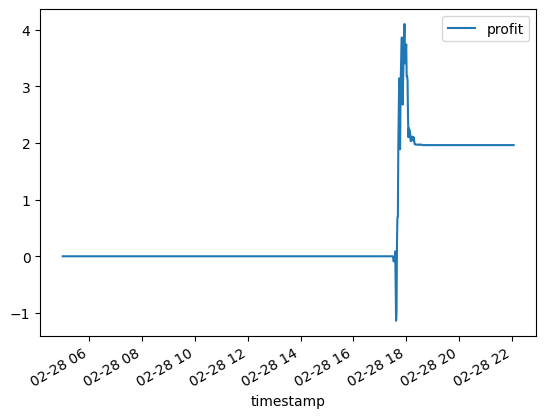

In [199]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

<Axes: xlabel='timestamp'>

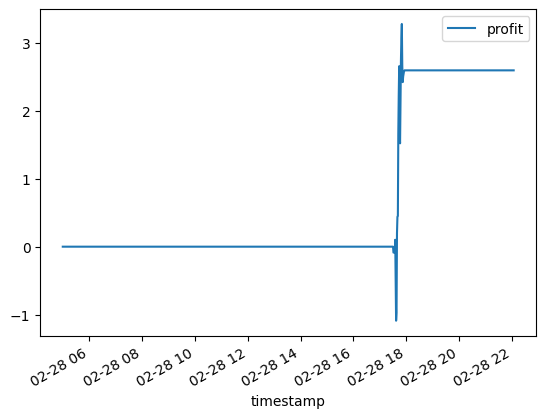

In [65]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

In [162]:
collective_feature_columns_no_rolling = ['ch', 'ch_max', 'ch_min', 'ch_since_max', 'ch_since_min']
df_collective_feature = dfst_feature.dropna().groupby('timestamp')[collective_feature_columns_no_rolling].median().resample('1min').asfreq().ffill()
df_collective_feature['ch_window30_min'] = df_collective_feature.ch.rolling(window=30).min() 
df_collective_feature['ch_window60_min'] = df_collective_feature.ch.rolling(window=60).min() 

<Axes: xlabel='timestamp'>

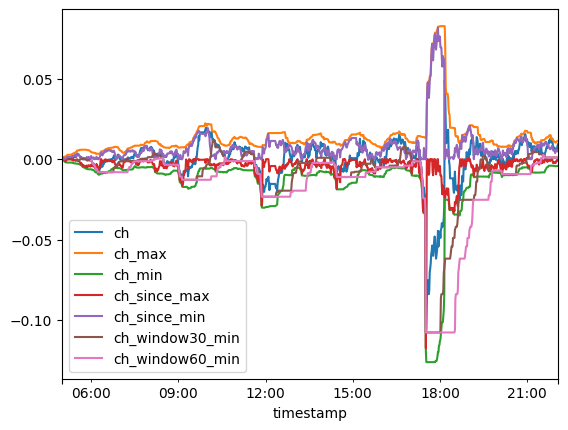

In [163]:
df_collective_feature.plot()

<Axes: xlabel='timestamp'>

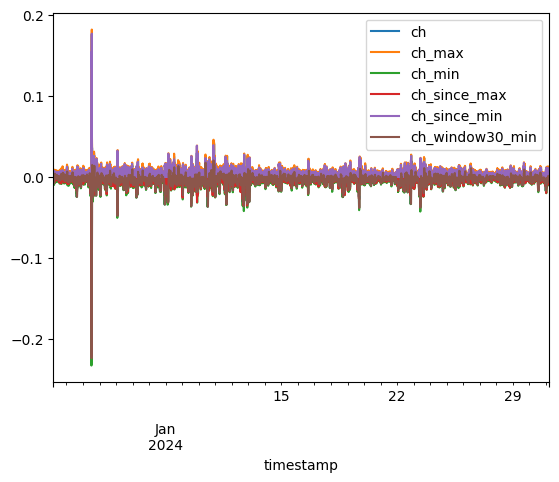

In [51]:
df_collective_feature.plot()

In [132]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
ZRX-USDT-SWAP,-0.030934
KNC-USDT-SWAP,-0.017371
NEO-USDT-SWAP,-0.014271
DOGE-USDT-SWAP,-0.013360
FRONT-USDT-SWAP,-0.013072
...,...
YGG-USDT-SWAP,0.069549
GPT-USDT-SWAP,0.070101
CEL-USDT-SWAP,0.074342


array([[<Axes: title={'center': 'profit'}>]], dtype=object)

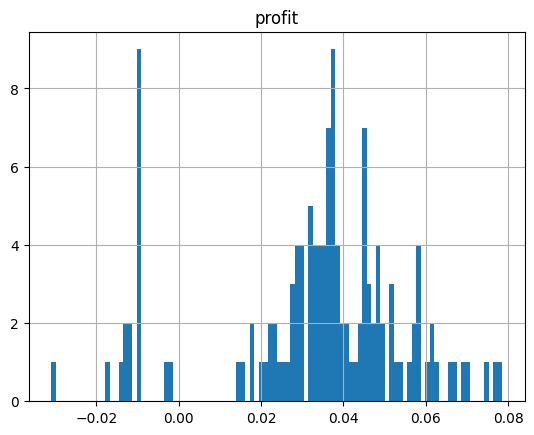

In [137]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit').hist(bins=100)

In [615]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if 'PERP' not in row['symbol']: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, PERP-USDT-SWAP, 1.6581, position_changed: 1.0
2024-01-03 12:16:00, PERP-USDT-SWAP, 1.8838, position_changed: -1.0
2024-01-03 12:17:00, PERP-USDT-SWAP, 1.8575, position_changed: 1.0
2024-01-03 12:18:00, PERP-USDT-SWAP, 1.8033, position_changed: -1.0
2024-01-03 12:19:00, PERP-USDT-SWAP, 1.6796, position_changed: 1.0
2024-01-03 12:23:00, PERP-USDT-SWAP, 1.81, position_changed: -1.0
2024-01-03 12:24:00, PERP-USDT-SWAP, 1.8786, position_changed: 1.0
2024-01-03 12:25:00, PERP-USDT-SWAP, 1.801, position_changed: -1.0
2024-01-03 12:26:00, PERP-USDT-SWAP, 1.8229, position_changed: 1.0
2024-01-03 12:27:00, PERP-USDT-SWAP, 1.7579, position_changed: -1.0
2024-01-03 12:28:00, PERP-USDT-SWAP, 1.81, position_changed: 1.0
2024-01-03 12:29:00, PERP-USDT-SWAP, 1.8183, position_changed: -1.0


In [28]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
USTC-USDT-SWAP,-0.011166
ICP-USDT-SWAP,-0.010988
SSV-USDT-SWAP,-0.010349
ARB-USDT-SWAP,-0.000929
FET-USDT-SWAP,0.003337
INJ-USDT-SWAP,0.005184
ACE-USDT-SWAP,0.006177
LDO-USDT-SWAP,0.008632
PERP-USDT-SWAP,0.008839


array([[<Axes: title={'center': 'profit'}>]], dtype=object)

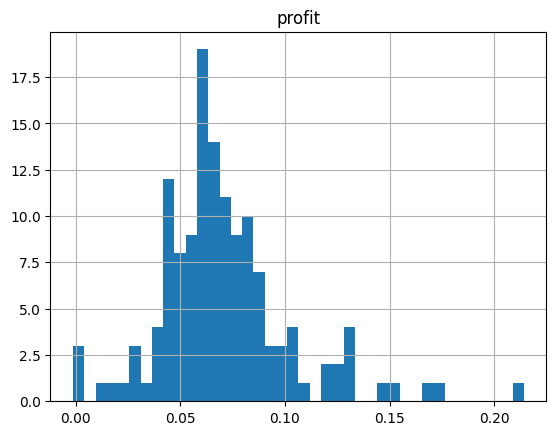

In [617]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().hist(bins=40)

In [41]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 13:14:00, ACE-USDT-SWAP, 8.439, position_changed: 1.0
2024-01-03 13:14:00, ICP-USDT-SWAP, 14.342, position_changed: 1.0
2024-01-03 13:14:00, LDO-USDT-SWAP, 3.128, position_changed: 1.0
2024-01-03 13:14:00, INJ-USDT-SWAP, 33.573, position_changed: 1.0
2024-01-03 13:14:00, PEOPLE-USDT-SWAP, 0.0178, position_changed: 1.0
2024-01-03 13:14:00, ORDI-USDT-SWAP, 76.4, position_changed: 1.0
2024-01-03 13:14:00, WSM-USDT-SWAP, 0.01654, position_changed: 1.0
2024-01-03 13:14:00, FET-USDT-SWAP, 0.6612, position_changed: 1.0
2024-01-03 13:14:00, SSV-USDT-SWAP, 27.92, position_changed: 1.0
2024-01-03 13:14:00, PERP-USDT-SWAP, 1.8153, position_changed: 1.0
2024-01-03 13:15:00, USTC-USDT-SWAP, 0.02776, position_changed: 1.0
2024-01-03 13:15:00, LDO-USDT-SWAP, 3.155, position_changed: -1.0
2024-01-03 13:15:00, PEOPLE-USDT-SWAP, 0.01848, position_changed: -1.0
2024-01-03 13:15:00, ARB-USDT-SWAP, 1.8717, position_changed: 1.0
2024-01-03 13:19:00, INJ-USDT-SWAP, 33.746, position_changed: -1.0
2

## single symobl

In [180]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.calculate_collective
importlib.reload(algo.jitter_recovery.calculate_collective)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.jitter_recovery.research_collective
importlib.reload(algo.jitter_recovery.research_collective)

<module 'algo.jitter_recovery.research_collective' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research_collective.py'>

In [181]:
symbol_investigate = 'NEO-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

In [182]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.10, -0.30, -0.15, +0.04, -0.02)

In [183]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.15, -0.1, +0.005, -0.01)

In [ ]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.03, -0.05, -0.03, +0.005, -0.01)

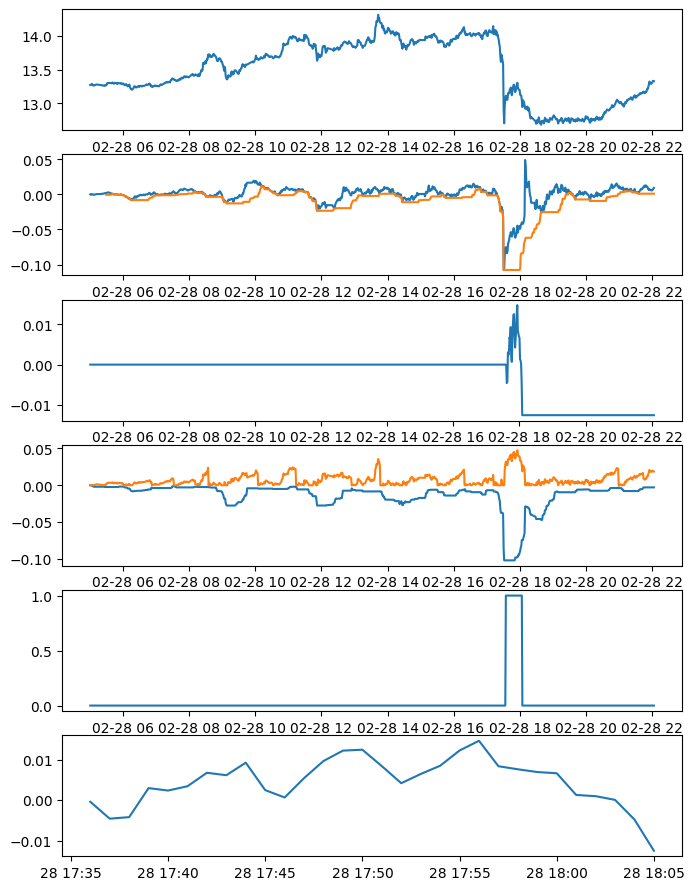

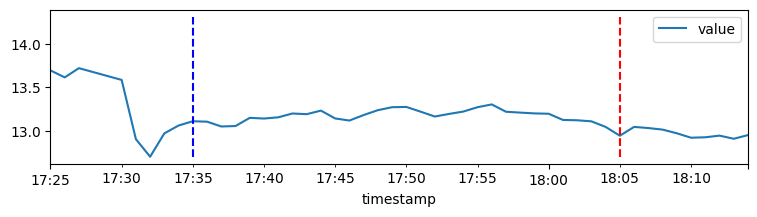

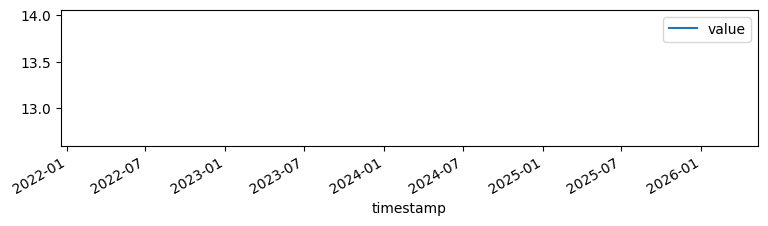

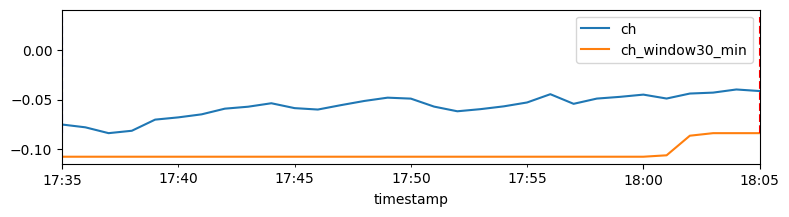

In [184]:
df_feature, df_trading = algo.jitter_recovery.research_collective.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

In [111]:
df_trading.columns

Index(['avg_v_before_max_ch', 'avg_v_before_min_ch', 'ch', 'ch_max', 'ch_min',
       'ch_since_max', 'ch_since_min', 'distance_max_ch', 'distance_min_ch',
       'v_ch_max_is_from', 'v_ch_max_is_to', 'v_ch_min_is_from',
       'v_ch_min_is_to', 'value', 'in_position', 'value_at_enter',
       'highest_since_enter', 'timedelta_since_position_enter',
       'v_ch_max_is_to_when_enter', 'v_ch_min_is_to_when_enter',
       'v_ch_max_is_from_when_enter', 'v_ch_min_is_from_when_enter',
       'ch_from_enter', 'ch_from_highest_since_enter', 'ch_collective',
       'ch_max_collective', 'ch_min_collective', 'ch_since_max_collective',
       'ch_since_min_collective', 'ch_window30_min_collective',
       'position_changed', 'profit_raw', 'profit'],
      dtype='object')

<Axes: xlabel='timestamp'>

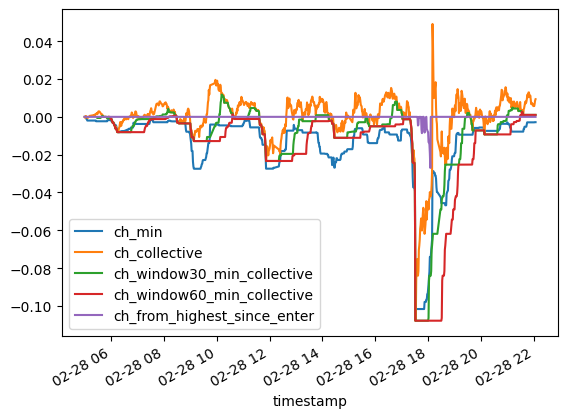

In [167]:
df_trading[['ch_min', 'ch_collective', 'ch_window30_min_collective', 'ch_window60_min_collective', 'ch_from_highest_since_enter']].plot()

In [577]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:13:00,0.000265,1,1.0,0.000000,0.000000
2024-01-03 12:16:00,0.000258,0,-1.0,-0.000014,-0.052225
2024-01-03 12:17:00,0.000275,1,1.0,0.000000,0.000000
2024-01-03 12:19:00,0.000269,0,-1.0,-0.000015,-0.053502
2024-01-03 12:20:00,0.000279,1,1.0,0.000000,0.000000
2024-01-03 12:26:00,0.000283,0,-1.0,0.000008,0.029080
2024-01-03 12:27:00,0.000278,1,1.0,-0.000000,-0.000000
2024-01-03 12:32:00,0.000286,0,-1.0,-0.000004,-0.012440


In [578]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, TURBO-USDT-SWAP, 0.0002649, position_changed: 1.0
2024-01-03 12:16:00, TURBO-USDT-SWAP, 0.0002577, position_changed: -1.0
2024-01-03 12:17:00, TURBO-USDT-SWAP, 0.0002746, position_changed: 1.0
2024-01-03 12:19:00, TURBO-USDT-SWAP, 0.0002689, position_changed: -1.0
2024-01-03 12:20:00, TURBO-USDT-SWAP, 0.0002791, position_changed: 1.0
2024-01-03 12:26:00, TURBO-USDT-SWAP, 0.0002831, position_changed: -1.0
2024-01-03 12:27:00, TURBO-USDT-SWAP, 0.0002781, position_changed: 1.0
2024-01-03 12:32:00, TURBO-USDT-SWAP, 0.0002858, position_changed: -1.0
